* The analysis aims to build a prediction model for customer churn propensity 
* After the prediction, the analysis also provide business solution for churn prevention with revenue-cost analysis

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

pd.options.display.float_format = '{:,.2f}'.format

In [163]:
#sns.distplot(T1['date_end'].apply(lambda x:x.month),color='green')

In [179]:
# Load csv containing all the information to build the model on
train_input = pd.read_csv("ml_case_training_data.csv")
print(train_input.shape)
print(train_input.columns)

(16096, 32)
Index(['id', 'activity_new', 'campaign_disc_ele', 'channel_sales', 'cons_12m',
       'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end',
       'date_first_activ', 'date_modif_prod', 'date_renewal',
       'forecast_base_bill_ele', 'forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max'],
      dtype='object')


In [180]:
# Load csv containing all the information to build the model on
test_input = pd.read_csv("ml_case_test_data.csv")
print(test_input.shape)
print(test_input.columns)

(4024, 32)
Index(['id', 'activity_new', 'campaign_disc_ele', 'channel_sales', 'cons_12m',
       'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end',
       'date_first_activ', 'date_modif_prod', 'date_renewal',
       'forecast_base_bill_ele', 'forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max'],
      dtype='object')


In [181]:
# Load the csv containing the churned customer ids training data
train_output = pd.read_csv("ml_case_training_output.csv")
print (train_output.shape)
train_output.info()

(16096, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
id       16096 non-null object
churn    16096 non-null int64
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


In [182]:
test_output = pd.read_csv("ml_case_test_output_template.csv")
print (test_output.shape)
test_output.info()

(4024, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 4 columns):
Unnamed: 0           4024 non-null int64
id                   4024 non-null object
Churn_prediction     0 non-null float64
Churn_probability    0 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 125.8+ KB


In [183]:
train_input.dtypes.sort_values()

num_years_antig               int64
nb_prod_act                   int64
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
forecast_cons_year            int64
forecast_cons               float64
net_margin                  float64
margin_net_pow_ele          float64
margin_gross_pow_ele        float64
imp_cons                    float64
forecast_price_pow_p1       float64
forecast_price_energy_p2    float64
forecast_price_energy_p1    float64
forecast_meter_rent_12m     float64
forecast_discount_energy    float64
pow_max                     float64
forecast_bill_12m           float64
forecast_base_bill_year     float64
forecast_base_bill_ele      float64
campaign_disc_ele           float64
forecast_cons_12m           float64
origin_up                    object
date_renewal                 object
date_modif_prod              object
has_gas                      object
date_first_activ             object
date_end                    

In [184]:
# Count number of unique values in each column of our training data. If there are 
# very few uniques, we might consider dropping the columns as that data might skew 
# our model. We do need to be careful about categorical data though, 
# i.e. we need to see what the data is before dropping the column.

In [185]:
for i in train_input.columns:
    if train_input[i].dtype !='object':
        print('\n {} '.format(i) )
        print(train_input[i].describe() )


 campaign_disc_ele 
count   0.00
mean     nan
std      nan
min      nan
25%      nan
50%      nan
75%      nan
max      nan
Name: campaign_disc_ele, dtype: float64

 cons_12m 
count       16,096.00
mean       194,804.38
std        679,515.08
min       -125,276.00
25%          5,906.25
50%         15,332.50
75%         50,221.50
max     16,097,108.00
Name: cons_12m, dtype: float64

 cons_gas_12m 
count      16,096.00
mean       31,911.64
std       177,588.46
min        -3,037.00
25%             0.00
50%             0.00
75%             0.00
max     4,188,440.00
Name: cons_gas_12m, dtype: float64

 cons_last_month 
count      16,096.00
mean       19,461.54
std        82,356.76
min       -91,386.00
25%             0.00
50%           901.00
75%         4,127.00
max     4,538,720.00
Name: cons_last_month, dtype: float64

 forecast_base_bill_ele 
count    3,508.00
mean       335.84
std        649.41
min       -364.94
25%          0.00
50%        162.95
75%        396.19
max     12,566.08
Na

In [186]:
train_input.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.00,"16,096.00","16,096.00","16,096.00","3,508.00","3,508.00","3,508.00","3,508.00","16,096.00","16,096.00",...,"15,970.00","15,970.00","15,970.00","16,096.00","16,083.00","16,083.00","16,096.00","16,081.00","16,096.00","16,093.00"
mean,nan,"194,804.38","31,911.64","19,461.54",335.84,335.84,"3,837.44",206.85,"2,370.56","1,907.35",...,0.14,0.05,43.53,196.12,22.46,21.46,1.35,217.99,5.03,20.60
std,nan,"679,515.08","177,588.46","82,356.76",649.41,649.41,"5,425.74",455.63,"4,035.09","5,257.36",...,0.03,0.05,5.21,494.37,23.70,27.92,1.46,366.74,1.68,21.77
min,nan,"-125,276.00","-3,037.00","-91,386.00",-364.94,-364.94,"-2,503.48",0.00,"-16,689.26","-85,627.00",...,0.00,0.00,-0.12,"-9,038.21",-525.54,-615.66,1.00,"-4,148.99",1.00,1.00
25%,nan,"5,906.25",0.00,0.00,0.00,0.00,"1,158.17",0.00,513.23,0.00,...,0.12,0.00,40.61,0.00,11.96,11.95,1.00,51.97,4.00,12.50
50%,nan,"15,332.50",0.00,901.00,162.95,162.95,"2,187.23",42.22,"1,179.16",378.00,...,0.14,0.09,44.31,44.47,21.09,20.97,1.00,119.68,5.00,13.86
75%,nan,"50,221.50",0.00,"4,127.00",396.19,396.19,"4,246.56",228.12,"2,692.08","1,994.25",...,0.15,0.10,44.31,218.09,29.64,29.64,1.00,275.81,6.00,19.80
max,nan,"16,097,108.00","4,188,440.00","4,538,720.00","12,566.08","12,566.08","81,122.63","9,682.89","103,801.93","175,375.00",...,0.27,0.20,59.44,"15,042.79",374.64,374.64,32.00,"24,570.65",16.00,500.00


In [187]:
train_input['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    7377
lmkebamcaaclubfxadlmueccxoimlema    2073
usilxuppasemubllopkaafesmlibmsdf    1444
ewpakwlliwisiwduibdlfmalxowmwpci     966
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [188]:
train_input['has_gas'].value_counts()

f    13132
t     2964
Name: has_gas, dtype: int64

In [189]:
train_input['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7825
kamkkxfxxuwbdslkwifmmcsiusiuosws    4517
ldkssxwpmemidmecebumciepifcamkci    3664
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [190]:
m=pd.cut(train_input['margin_gross_pow_ele'],bins=10)

In [191]:
m.value_counts()

(14.568, 104.586]       10952
(-75.45, 14.568]         4942
(104.586, 194.604]        126
(194.604, 284.622]         46
(284.622, 374.64]           5
(-165.468, -75.45]          5
(-255.486, -165.468]        2
(-345.504, -255.486]        2
(-526.44, -435.522]         2
(-435.522, -345.504]        1
Name: margin_gross_pow_ele, dtype: int64

In [192]:
T=train_input[['id', 
             #categorical
             'activity_new','origin_up', 'campaign_disc_ele', 'channel_sales', 
             'has_gas', 'nb_prod_act', 'num_years_antig',
             #numerical
             'cons_12m','cons_gas_12m', 'cons_last_month', 
             # relavent num
              'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele','net_margin',
             #date
             'date_activ', 'date_end','date_first_activ', 'date_modif_prod', 'date_renewal']]

* start to feature engineer

In [194]:

T['activity_new']=T['activity_new'].fillna('NA')
ActDum=T['activity_new'].value_counts()[T['activity_new'].value_counts()>50].index.tolist()
T['activity_new_clean']=T.apply(lambda x: x['activity_new']if x['activity_new'] in ActDum else 'other',axis=1)

C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [196]:
T['activity_new_clean'].value_counts()

NA                                  9545
other                               2971
apdekpcbwosbxepsfxclislboipuxpop    1577
kkklcdamwfafdcfwofuscwfwadblfmce     422
kwuslieomapmswolewpobpplkaooaaew     230
fmwdwsxillemwbbwelxsampiuwwpcdcb     219
ckfxocssowaeipxueikxcmaxdmcduxsa     189
cwofmuicebbcmiaaxufmfimpowpacobu     122
cluecxlameloamldmasudocsbmaoamdw     119
wxemiwkumpibllwklfbcooafckufkdlm     119
sfisfxfcocfpcmckuekokxuseixdaoeu      83
sffadmsbuamddwapeumdfibkmpkdicmc      75
sxublbwoeuckkocekklxkllcdxxaisop      72
ipdldckuswupeifllfbwccfpeafludfi      64
saxlifeumaobawxpemwuopbwwldlucff      62
dupxuibdflmskeieweeofcaluuuiioix      61
daobdssbkieoukwxbopxiiospudkopwl      58
ibkiiwcxiccxpoedpweiuxwbxbuewbxm      57
cfdsselwimsklimddecfifseabdkxfcs      51
Name: activity_new_clean, dtype: int64

In [197]:
s={}
for column in T.columns:
    if sum(T[column].isnull())>0:
        s[column]=(sum(T[column].isnull()),T[column].nunique())

In [198]:
s

{'campaign_disc_ele': (16096, 0),
 'channel_sales': (4218, 7),
 'date_end': (2, 371),
 'date_first_activ': (12588, 1133),
 'date_modif_prod': (157, 2307),
 'date_renewal': (40, 398),
 'margin_gross_pow_ele': (13, 2979),
 'margin_net_pow_ele': (13, 3006),
 'net_margin': (15, 13189),
 'origin_up': (87, 5)}

In [199]:
T['First_activ_Tag']=T['date_first_activ'].isnull()

C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [201]:
for column in T.columns:
    if column.startswith('date'):
        ##print(T[column].dtype)
        T[column]=pd.to_datetime(T.loc[:,column])

C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [209]:
T.sort_values(by=['date_activ'],ascending=True,inplace=True)

C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


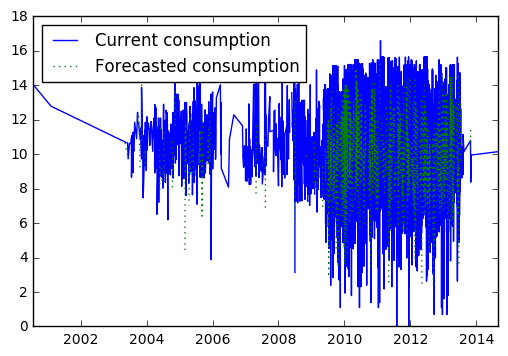

In [215]:
plt.plot(T['date_activ'],np.log(T['cons_12m']),c='b')
plt.plot(T['date_activ'],np.log(T['cons_gas_12m']),c='g',linestyle=':')
plt.legend(['Current consumption','Forecasted consumption'],loc='upper left')

In [ ]:
train_

C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


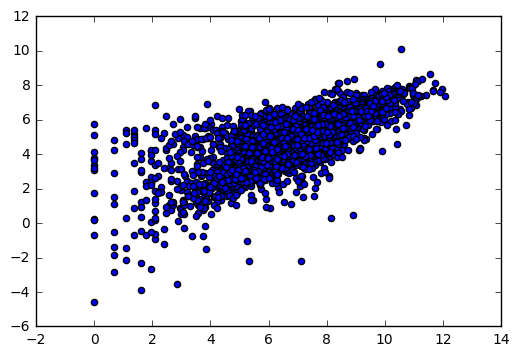

In [235]:

plt.scatter(np.log(train_input['forecast_cons_year']),np.log(train_input['net_margin']))

In [117]:
values = {'activity_new': 'NA', 'channel_sales': 'NA'}
T=T.fillna(value=values)

In [113]:
T['campaign_disc_ele']=T['campaign_disc_ele'].fillna('NA')

C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [110]:
T['activity_new'].nunique()

419

In [124]:
T=T.fillna()

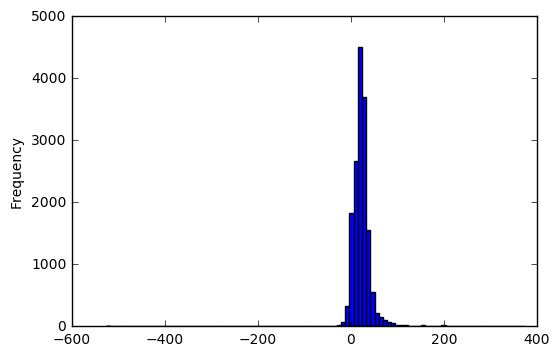

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

T['margin_gross_pow_ele'].plot.hist(by='margin_gross_pow_ele',bins=100)

* for not num var, get dummies with pd

In [75]:
T.describe().loc['count']

campaign_disc_ele           $0.00
nb_prod_act            $16,096.00
num_years_antig        $16,096.00
cons_12m               $16,096.00
cons_gas_12m           $16,096.00
cons_last_month        $16,096.00
imp_cons               $16,096.00
margin_gross_pow_ele   $16,083.00
margin_net_pow_ele     $16,083.00
net_margin             $16,081.00
Name: count, dtype: float64

In [78]:
T['net_margin']=T['net_margin'].fillna(T['net_margin'].mean())

C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
sum(T['net_margin'].isnull())

In [68]:
l=[]
for x in T.columns:
    if x not in  T.describe().columns:
        l.append(x)

In [69]:
l

['id',
 'activity_new',
 'origin_up',
 'channel_sales',
 'has_gas',
 'date_activ',
 'date_end',
 'date_first_activ',
 'date_modif_prod',
 'date_renewal',
 'activity_new_clean']

In [83]:
T.drop(columns=['activity_new','campaign_disc_ele'],inplace=True)

C:\Users\Yilun\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

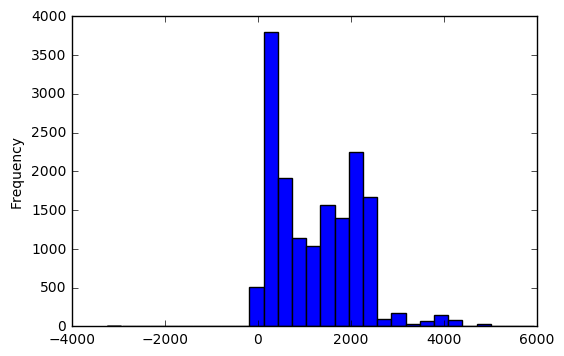

In [88]:
T['Act_Year']=T.apply(lambda x:x['date_activ'].year,axis=1)

T['Act_Year']=T.apply(lambda x:x['date_activ'].year,axis=1)

T['Start_Stop_Int']=T.apply(lambda x: (x['date_end']-x['date_activ'])/datetime.timedelta(days=1),axis=1)

T['Modi_Stop_Int']=T.apply(lambda x: (x['date_end']-x['date_modif_prod'])/datetime.timedelta(days=1),axis=1)

T['Modi_Stop_Int'].plot.hist(bins=30)

In [90]:
T.columns

Index(['id', 'origin_up', 'channel_sales', 'has_gas', 'nb_prod_act',
       'num_years_antig', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin',
       'date_activ', 'date_end', 'date_first_activ', 'date_modif_prod',
       'date_renewal', 'activity_new_clean', 'Act_Year', 'Start_Stop_Int',
       'Modi_Stop_Int'],
      dtype='object')

In [99]:
T1=pd.get_dummies(T.drop(columns=[ 'date_activ', 'date_end', 'date_first_activ', 'date_modif_prod',
       'date_renewal']).dropna(),columns=[
 'origin_up',
 'channel_sales',
 'has_gas','activity_new_clean'],drop_first=True)

In [100]:
T1.set_index('id',inplace=True)

In [216]:
print(T1.dtypes)

nb_prod_act                                              int64
num_years_antig                                          int64
cons_12m                                                 int64
cons_gas_12m                                             int64
cons_last_month                                          int64
imp_cons                                               float64
margin_gross_pow_ele                                   float64
margin_net_pow_ele                                     float64
net_margin                                             float64
Act_Year                                                 int64
Start_Stop_Int                                         float64
Modi_Stop_Int                                          float64
origin_up_ldkssxwpmemidmecebumciepifcamkci               uint8
origin_up_lxidpiddsbxsbosboudacockeimpuepw               uint8
origin_up_usapbepcfoloekilkwsdiboslwaxobdp               uint8
channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci         

In [217]:
print(T1.apply(pd.Series.count))

nb_prod_act                                            11651
num_years_antig                                        11651
cons_12m                                               11651
cons_gas_12m                                           11651
cons_last_month                                        11651
imp_cons                                               11651
margin_gross_pow_ele                                   11651
margin_net_pow_ele                                     11651
net_margin                                             11651
Act_Year                                               11651
Start_Stop_Int                                         11651
Modi_Stop_Int                                          11651
origin_up_ldkssxwpmemidmecebumciepifcamkci             11651
origin_up_lxidpiddsbxsbosboudacockeimpuepw             11651
origin_up_usapbepcfoloekilkwsdiboslwaxobdp             11651
channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci         11651
channel_sales_foosdfpfku

In [218]:
train_output.set_index('id',inplace=True)

In [220]:
T1_Out=train_output.loc[T1.index.get_values().tolist()]

In [2]:
#T1.head()

In [227]:
T.set_index('date_activ')['2005-01-01':]

,id,activity_new,origin_up,campaign_disc_ele,channel_sales,has_gas,nb_prod_act,num_years_antig,cons_12m,cons_gas_12m,...,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,net_margin,date_end,date_first_activ,date_modif_prod,date_renewal,activity_new_clean,First_activ_Tag
date_activ,,,,,,,,,,,,,,,,,,,,,
2005-01-01,2b579605333ca465e53d59d48c9f0a1b,fmwdwsxillemwbbwelxsampiuwwpcdcb,ldkssxwpmemidmecebumciepifcamkci,nan,NaN,f,1,11,184338,0,...,232.94,29.64,29.64,314.01,2017-01-01,NaT,2015-05-24,2016-01-02,fmwdwsxillemwbbwelxsampiuwwpcdcb,True
2005-01-07,7fb767948e9edd930722609a46cb14e3,NA,ldkssxwpmemidmecebumciepifcamkci,nan,NaN,f,1,11,46203,0,...,406.28,62.28,62.28,530.56,2017-01-07,NaT,2005-01-07,2016-01-08,NA,True
2005-01-07,0a87b73bc5dfa50fc0dc20a87bfe25a1,daobdssbkieoukwxbopxiiospudkopwl,ldkssxwpmemidmecebumciepifcamkci,nan,NaN,f,1,11,65431,0,...,656.82,19.68,19.68,572.88,2016-03-06,NaT,2015-03-09,2015-03-09,daobdssbkieoukwxbopxiiospudkopwl,True
2005-01-12,a5f0362398eacbf6d40570635d5db857,NA,ldkssxwpmemidmecebumciepifcamkci,nan,NaN,f,1,11,41600,0,...,380.44,49.44,49.44,469.40,2017-01-12,NaT,2016-01-14,2016-01-14,NA,True
2005-01-13,a6effeb924c64b2dc8120ea7ba600617,NA,ldkssxwpmemidmecebumciepifcamkci,nan,NaN,f,1,11,89022,0,...,"1,584.78",52.44,52.44,753.31,2016-02-14,NaT,2005-01-13,2015-02-16,NA,True
2005-01-18,0ab1981333914eaf67caa523e35aab94,NA,ldkssxwpmemidmecebumciepifcamkci,nan,NaN,f,2,11,51748,0,...,904.49,29.64,29.64,441.07,2017-01-18,NaT,2015-05-24,2016-01-19,NA,True
2005-01-19,155dafee114c6d9f73f1922353696a27,wlxfbefauebfbauopppswxppaafdkoap,ldkssxwpmemidmecebumciepifcamkci,nan,NaN,f,1,11,267470,0,...,"2,319.17",-0.24,-0.24,"1,301.37",2016-02-21,NaT,2005-01-19,2015-02-23,other,True
2005-01-24,16c3208d87f5a27345125d4616473e75,NA,ldkssxwpmemidmecebumciepifcamkci,nan,NaN,f,1,11,3405,0,...,67.13,23.76,23.76,51.57,2016-06-20,NaT,2014-02-20,2015-06-23,NA,True
2005-01-24,b47f1c32d6442710226415646db08793,NA,ldkssxwpmemidmecebumciepifcamkci,nan,NaN,f,2,11,73482,0,...,"1,074.36",19.80,19.80,623.04,2017-01-24,NaT,2015-12-17,2016-01-25,NA,True


In [ ]:
TS_Sample=T.copy()[]

* done with cleaning

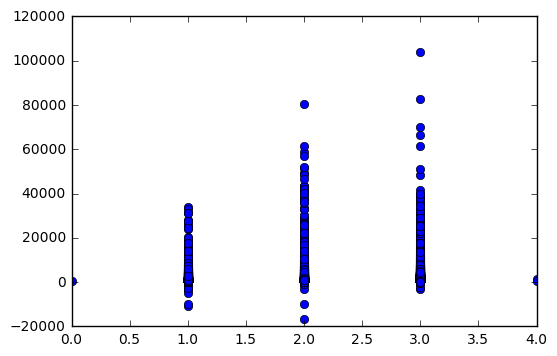

In [392]:
plt.plot(data1['origin_up'],data1['forecast_cons_12m'], 'bo')

In [ ]:
# We have to apply the same changes to our test data as well, which
# is relatively straightforward as it involves repeating the same code
# as above but for the test data.

In [398]:
data2 = pd.read_csv("ml_case_test_data.csv")

In [399]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 32 columns):
id                          4024 non-null object
activity_new                1670 non-null object
campaign_disc_ele           0 non-null float64
channel_sales               2968 non-null object
cons_12m                    4024 non-null int64
cons_gas_12m                4024 non-null int64
cons_last_month             4024 non-null int64
date_activ                  4024 non-null object
date_end                    4024 non-null object
date_first_activ            877 non-null object
date_modif_prod             3979 non-null object
date_renewal                4020 non-null object
forecast_base_bill_ele      877 non-null float64
forecast_base_bill_year     877 non-null float64
forecast_bill_12m           877 non-null float64
forecast_cons               877 non-null float64
forecast_cons_12m           4024 non-null float64
forecast_cons_year          4024 non-null int64
forecast_discount

In [236]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# for logistic regression, not consider all time range span

In [237]:
from sklearn.cross_validation import train_test_split

In [133]:
X_train,X_test,y_train,y_test=train_test_split(T1,T1_Out,test_size=0.33,random_state=42)

In [396]:
l_log=list(x for x in X_train.columns if not x.startswith('date'))

In [116]:
log = LogisticRegression()
log.fit(X_train,y_train)

C:\Users\Yilun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
* find the test dataset for x

In [120]:
pred=log.predict(X_test)

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
##from sklearn.ensemble import VotingClassifier

In [125]:
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import  RandomizedSearchCV, GridSearchCV

In [127]:
from sklearn.cross_validation import train_test_split
import time
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix

### 1. logistic regression as baseline for the model tuning
### 2. tree as model as baseline
### 3. Random Forest as enhancement

In [238]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [261]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix

In [244]:
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import  RandomizedSearchCV, GridSearchCV

In [240]:
X_train,X_test,y_train,y_test=train_test_split(T1,T1_Out,test_size=0.33,random_state=42)

In [241]:
tc = DecisionTreeClassifier()
tc.fit(X_train,y_train)
pred=tc.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.90      0.90      0.90      3420
          1       0.23      0.23      0.23       425

avg / total       0.83      0.83      0.83      3845



In [246]:
y_train=y_train.iloc[:,0]

In [247]:
params = {'max_depth':[2,4,8]}

tcgrid = GridSearchCV(estimator=tc,param_grid=params,cv=5,scoring='recall')
tcgrid.fit(X_train,y_train)

end = time.time()
print(end-start)

65608.37198519707


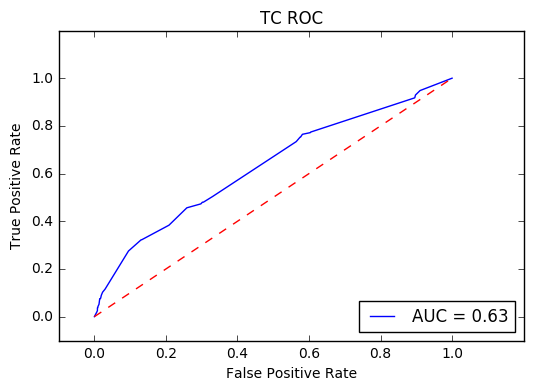

In [248]:
X_train_roc, X_test_roc,y_train_roc, y_test_roc = train_test_split(T1,T1_Out,test_size=0.33,random_state=42)

actual = y_test_roc

y_pred = tcgrid.predict_proba(X_test_roc)
predictions = y_pred[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('TC ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


* select the threshold and draw confusion matrics

In [255]:
dfdata={'false_positive_rate':false_positive_rate, 'true_positive_rate':true_positive_rate, 'thresholds':thresholds}
df=pd.DataFrame(data=dfdata)
df.set_index('thresholds',inplace=True)

In [283]:
pd.options.display.float_format = '{:,.3f}'.format
df

,false_positive_rate,true_positive_rate
thresholds,,
2.000,0.000,0.000
1.000,0.007,0.021
0.900,0.008,0.026
0.875,0.008,0.035
0.846,0.009,0.038
0.800,0.010,0.038
0.750,0.010,0.040
0.667,0.010,0.042
0.633,0.013,0.052


(array([2.626e+03, 7.760e+02, 3.390e+02, 1.600e+01, 0.000e+00, 5.000e+00,
        3.300e+01, 1.000e+00, 9.000e+00, 4.000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

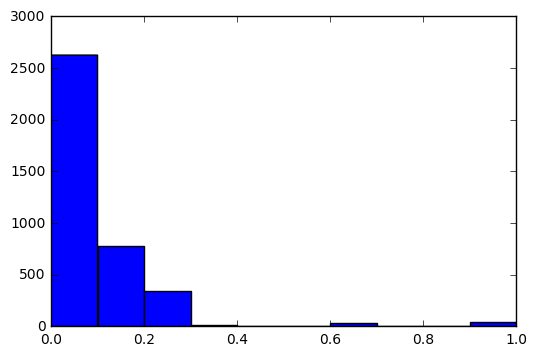

In [290]:
plt.hist(y_pred[:,1])

In [291]:
# us 0.087 as threshold and calculate confusion matrics
pred_cust=[1 if x<0.087 else 0 for x in y_pred[:,1]]

confusion_matrix(y_test_array,pred_cust)

In [ ]:
y_pred = tcgrid.predict_proba(X_test_roc)

In [ ]:
# the following is using rf

In [294]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.90      0.99      0.94      3420
          1       0.60      0.07      0.12       425

avg / total       0.86      0.89      0.85      3845



In [295]:
# recall is really low
# using randomized search and use recall as score

In [296]:

rf = RandomForestClassifier(max_depth=4)
rf.fit(X_train,y_train)

params = {'max_depth': [8, 16, 32], 'min_samples_leaf':[2, 4, 8]}

rfgrid = RandomizedSearchCV(estimator=rf,param_distributions=params,cv=5,scoring='recall',n_iter=3)
rfgrid.fit(X_train,y_train)


pred=rfgrid.predict(X_test)
print(classification_report(y_test,pred))

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=3, n_jobs=1,
          param_distributions={'min_samples_leaf': [2, 4, 8], 'max_depth': [8, 16, 32]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='recall', verbose=0)

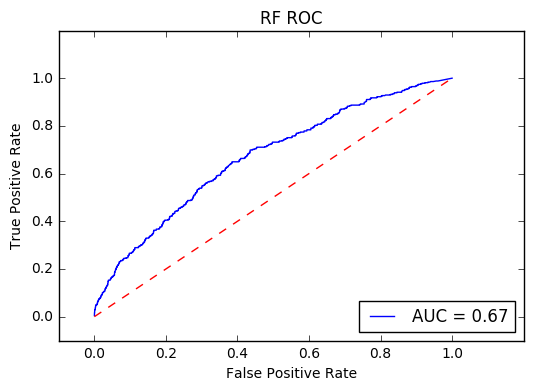

In [299]:

y_pred = rfgrid.predict_proba(X_test)
predictions = y_pred[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('RF ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [301]:
# us 0.087 as threshold and calculate confusion matrics
pred_cust=[1 if x>0.087 else 0 for x in y_pred[:,1]]

confusion_matrix(y_test_array,pred_cust)

array([[1951, 1469],
       [ 135,  290]])

In [130]:
# Start building ML models. I will use Decision Tree, Bagging Classifier,
# Logistic Regression, Random Forest, Adaptive Boosting, and finally a 
# Voting Classifier that incorporates the best of these models.

tc = DecisionTreeClassifier()
tc.fit(X_train,y_train)
pred=tc.predict(X_test)
print(classification_report(y_test,pred))

bag = BaggingClassifier(base_estimator=tc)
bag.fit(X_train,y_train)
pred=bag.predict(X_test)
print(classification_report(y_test,pred))

log = LogisticRegression()
log.fit(X_train,y_train)
pred=log.predict(X_test)
print(classification_report(y_test,pred))

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print(classification_report(y_test,pred))

ada = AdaBoostClassifier(base_estimator=rf)
ada.fit(X_train,y_train)
pred=ada.predict(X_test)
print(classification_report(y_test,pred))


             precision    recall  f1-score   support

          0       0.90      0.89      0.90      3420
          1       0.21      0.23      0.22       425

avg / total       0.83      0.82      0.82      3845



C:\Users\Yilun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       0.90      0.99      0.94      3420
          1       0.56      0.09      0.15       425

avg / total       0.86      0.89      0.85      3845

             precision    recall  f1-score   support

          0       0.89      1.00      0.94      3420
          1       0.00      0.00      0.00       425

avg / total       0.79      0.89      0.84      3845



C:\Users\Yilun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


             precision    recall  f1-score   support

          0       0.89      1.00      0.94      3420
          1       0.66      0.05      0.10       425

avg / total       0.87      0.89      0.85      3845



C:\Users\Yilun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       0.90      0.99      0.94      3420
          1       0.54      0.08      0.13       425

avg / total       0.86      0.89      0.85      3845



In [144]:
# Optimize classifiers

start = time.time()

tc = DecisionTreeClassifier(max_depth=4)
##tc.fit(X_train,y_train)

In [152]:
y_train=y_train.iloc[:,0]

In [153]:
params = {'max_depth':[2,4,8]}

tcgrid = GridSearchCV(estimator=tc,param_grid=params,cv=5,scoring='recall')
tcgrid.fit(X_train,y_train)

end = time.time()
print(end-start)

71.78061175346375


In [154]:
start = time.time()

params = {'C':[0.01,0.1,1,10]}

loggrid = RandomizedSearchCV(estimator=log,param_distributions=params,cv=5,scoring='recall',n_iter=3)
loggrid.fit(X_train,y_train)

end = time.time()
print(end-start)
start = time.time()

rf = RandomForestClassifier(max_depth=4)
rf.fit(X_train,y_train)

params = {'max_depth': [8, 16, 32], 'min_samples_leaf':[2, 4, 8]}

rfgrid = RandomizedSearchCV(estimator=rf,param_distributions=params,cv=5,scoring='recall',n_iter=3)
rfgrid.fit(X_train,y_train)

end = time.time()
print(end-start)

1.3813390731811523
1.5336577892303467


In [155]:
start = time.time()

bag = BaggingClassifier(base_estimator=tcgrid.best_estimator_,n_estimators=2)
bag.fit(X_train,y_train)

params = {'base_estimator':[tcgrid.best_estimator_,rfgrid.best_estimator_],'n_estimators':[2,3,4]}

baggrid = RandomizedSearchCV(estimator=bag,param_distributions=params,cv=5,scoring='recall',n_iter=3)
baggrid.fit(X_train,y_train)

end = time.time()
print(end-start)
start = time.time()

abc = AdaBoostClassifier(base_estimator=rfgrid.best_estimator_,n_estimators=4)
abc.fit(X_train,y_train)

params = {'base_estimator':[tcgrid.best_estimator_,rfgrid.best_estimator_],'n_estimators':[2,3,4]}

abcgrid = RandomizedSearchCV(estimator = abc, param_distributions= params, cv=5, scoring='recall',n_iter=3)
abcgrid.fit(X_train,y_train)

end = time.time()
print(end-start)

1.7399988174438477
3.9891579151153564


### Estimate the efficiency of the model compared with accuracy

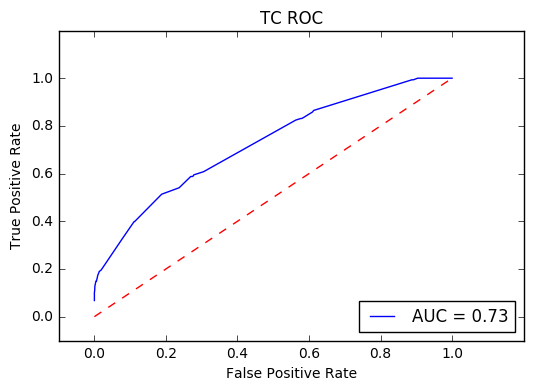

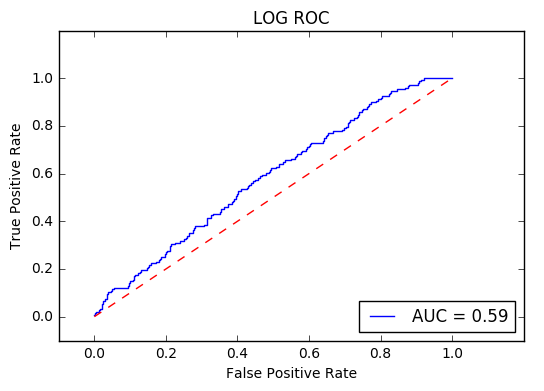

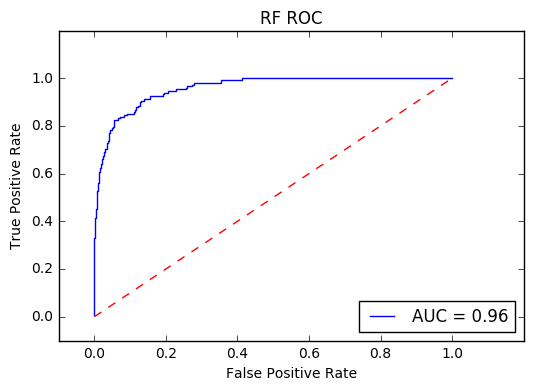

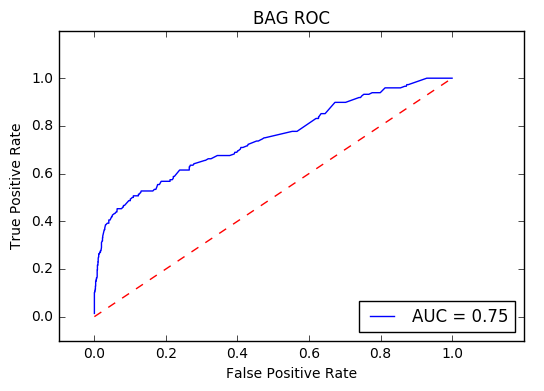

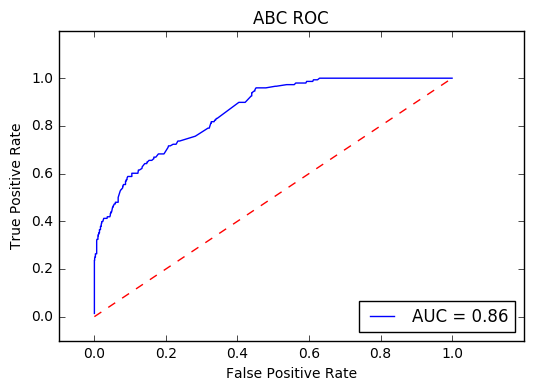

In [156]:
# Plot ROC curves to see how well each model is predicting the training data

X_train_roc, X_test_roc,y_train_roc, y_test_roc = train_test_split(X_train,y_train,test_size=0.2,random_state=73)

actual = y_test_roc

y_pred = tcgrid.predict_proba(X_test_roc)
predictions = y_pred[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('TC ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

y_pred = loggrid.predict_proba(X_test_roc)
predictions = y_pred[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('LOG ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

y_pred = rfgrid.predict_proba(X_test_roc)
predictions = y_pred[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('RF ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

y_pred = baggrid.predict_proba(X_test_roc)
predictions = y_pred[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('BAG ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

y_pred = abcgrid.predict_proba(X_test_roc)
predictions = y_pred[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('ABC ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
# We can see that the log classifier is not predicting the data well. Hence, we will get rid
# of it, and instead just use a random forest with the adaptive boosting. We will continue
# with the best estimators of each of the classifiers.

rfgrid_best = rfgrid.best_estimator_
baggrid_best = baggrid.best_estimator_
abcgrid_best = abcgrid.best_estimator_

print(rfgrid_best)
print(baggrid_best)
print(abcgrid_best)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=32, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=32, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=2, n_jobs=1, oob_sco

In [22]:
# Create a voting classifier that uses multiple classifiers

vclf = VotingClassifier(estimators=[('RF', rfgrid_best), ('BAG', baggrid_best), ('AB', abcgrid_best)],
                        voting='soft')

params = {
  'RF__max_depth': [4, 8], 'RF__min_samples_leaf':[3, 4],
  'BAG__n_estimators':[3,4],
  'AB__n_estimators':[3,4]}

allgrid = RandomizedSearchCV(estimator=vclf, param_distributions=params, cv=5, 
                             scoring = 'accuracy',
                             random_state=1, verbose=1, n_iter=5)

allgrid.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   47.2s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=VotingClassifier(estimators=[('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=32, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_sp...ors=2, random_state=None))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None),
          fit_params=None, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'RF__max_depth': [4, 8], 'RF__min_samples_leaf': [3, 4], 'BAG__n_estimators': [3, 4], 'AB__n_estimators': [3, 4]},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=1)

In [157]:
y_pred = allgrid.predict_proba(X_test_roc)
predictions = y_pred[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('VOTING ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'allgrid' is not defined

## Random Forest feature importances 
## - Dimention reduction and business analysis

In [159]:
pd.options.display.float_format = '{:,.2f}'.format


importances = rf.feature_importances_
mean = np.mean([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

# indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance:")
print("")

X_train_lst = []
for column in X_train:
     X_train_lst.append(column)

X_train_ser = pd.Series(X_train_lst)
        
# for i in range(len(X_train_lst)):
#     print('Feature: ',X_train_lst[i],mean[i])

feature_imp = pd.DataFrame(
{'Feature':X_train_ser,
 'Importance':mean})

feature_imp.sort_values(by='Importance',inplace=True,ascending=False)
print(feature_imp)

# From the feature importance dataframe, we can predict the most
# explicative features for the churning of customers according 
# to our model. 

In [24]:
# Check importance of features to figure out which are the most explicative
# variables to churn.

importances = rf.feature_importances_
mean = np.mean([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

# indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance:")
print("")

X_train_lst = []
for column in X_train:
     X_train_lst.append(column)

X_train_ser = pd.Series(X_train_lst)
        
# for i in range(len(X_train_lst)):
#     print('Feature: ',X_train_lst[i],mean[i])

feature_imp = pd.DataFrame(
{'Feature':X_train_ser,
 'Importance':mean})

feature_imp.sort_values(by='Importance',inplace=True,ascending=False)
print(feature_imp)

# From the feature importance dataframe, we can predict the most
# explicative features for the churning of customers according 
# to our model. 

Feature importance:

                                           Feature  Importance
16                              margin_net_pow_ele    0.195327
15                            margin_gross_pow_ele    0.129410
3                                       date_activ    0.088858
35      origin_up_lxidpiddsbxsbosboudacockeimpuepw    0.072867
2                                  cons_last_month    0.068439
6                                     date_renewal    0.065548
10                         forecast_meter_rent_12m    0.064408
24  channel_sales_foosdfpfkusacimwkcsosbicdxkicaua    0.039183
18                                      net_margin    0.036204
0                                         cons_12m    0.034778
19                                 num_years_antig    0.034065
11                        forecast_price_energy_p1    0.030318
20                                         pow_max    0.022780
33      origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws    0.018741
14                                

In [25]:
# The most important factor is "margin_net_pow_ele", i.e net
# margin on power subscription for the customer. This is not
# that surprising because it is likely that customers likely
# to churn are customers who are being charged a higher price
# and hence are likely to go ahead with cheaper alternatives.

# The next most explicative factor, around 3 times less explicative
# than the net margin, is "margin_gross_pow_ele", i.e. gross
# margin on power subscription for the customer. This is further
# support of the higher price resulting in customers opting
# for cheapter alternatives.


In [26]:
# Conduct 10 fold cross validation to assess model

vclf_scores = cross_val_score(allgrid, X_train, y_train, cv=10, scoring='accuracy')
print(vclf_scores.mean())

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   42.2s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   41.7s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   42.1s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   41.4s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   48.2s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   51.3s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   52.7s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   51.2s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   51.1s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   55.4s finished


0.903392053437


In [27]:
# Predict churned customers based on voting classifier

y_pred = allgrid.predict(X_test)

y_pred_prob = allgrid.predict_proba(X_test)
prob = y_pred_prob[:,1]

indices_list = [i for i in range(len(y_pred))]

prediction = pd.DataFrame(
{'index': indices_list,
 'id':X_test_id,
 'Churn_prediction':y_pred,
 'Churn_probability':prob})

prediction = prediction[['index','id','Churn_prediction','Churn_probability']]

prediction.to_csv('ML_case_predictions.csv',index=False)

In [28]:
# Finding a more explicit relation between sales channels and churn.
# Start by creating a new dataframe for the 11 churned customers that
# our model predicts.

y_pred_ser = pd.Series(y_pred)
churned_df = prediction[prediction['Churn_prediction']==1]
print(churned_df)

      index                                id  Churn_prediction  \
40       40  0f644e4211eb1cb8b36a47900b624704                 1   
256     256  73b1bd0e7e6c6b41b9f5892ff2541bfe                 1   
1471   1471  b911acb75a072fd9fd50ab3f8a38b658                 1   
1628   1628  af746cde31bc82e7262c592a85e0adf7                 1   
1973   1973  7dd7456999d4ba2f4bb00ec099539ed5                 1   
2206   2206  ec51f1eac2ba4e31d93f7ea8c8f2c2e8                 1   
2673   2673  25ac33d516bc673cad5bdc234661bcda                 1   
3449   3449  c52e685799c5ce920d2657aff7790177                 1   
3490   3490  82b7f5395e6f4b6f6d0251014340e7b0                 1   
3964   3964  ca2a33c56686f237b7e1d973c16d5631                 1   

      Churn_probability  
40             0.506892  
256            0.510502  
1471           0.544634  
1628           0.773724  
1973           0.623294  
2206           0.748901  
2673           0.752185  
3449           0.579664  
3490           0.552817  
39

In [29]:
# Get the indices of these customers and add them to a list so 
# that we can access it more easily for future steps.

churned_index = churned_df["index"].tolist()
print(len(churned_index))

10


In [51]:
# Get the sales channels that these churned customers belong to.

values = data2['channel_sales'].value_counts()
print("Percentage of sales channels amongst test data:")
print("")
print(values*100/data2['channel_sales'].count())
print("")

churned_channels = data2['channel_sales'].iloc[churned_index]

print("Probability of sales channels for churned customers:")
print("")
print(churned_channels.value_counts()/len(churned_index))

# We notice that there are only 3 types of sales channels within
# the 11 customers that our churning according to our model. Of
# these, 9 customers are using "foosdfpfkusacimwkcsosbicdxkicaua"
# channel, 1 is using "ewpakwlliwisiwduibdlfmalxowmwpci" channel,
# and 1 is unknown.

Percentage of sales channels amongst test data:

foosdfpfkusacimwkcsosbicdxkicaua    60.343666
lmkebamcaaclubfxadlmueccxoimlema    17.789757
usilxuppasemubllopkaafesmlibmsdf    13.207547
ewpakwlliwisiwduibdlfmalxowmwpci     8.490566
fixdbufsefwooaasfcxdxadsiekoceaa     0.067385
epumfxlbckeskwekxbiuasklxalciiuu     0.067385
sddiedcslfslkckwlfkdpoeeailfpeds     0.033693
Name: channel_sales, dtype: float64

Probability of sales channels for churned customers:

foosdfpfkusacimwkcsosbicdxkicaua    0.9
ewpakwlliwisiwduibdlfmalxowmwpci    0.1
Name: channel_sales, dtype: float64


### Conducted profitability analysis for this model

In [47]:
# We can use the forecast_cons_12m column to see whether
# the customers predicted to churn are actually forecasted
# to have a lower consumption for the same time period as
# the one trained on.

test_data = pd.read_csv('ml_case_test_data.csv')

# Check date of activation of current contract of churned customers
churned_elc_cons=test_data['date_activ'].iloc[churned_index]
print("Date of activation of current contract:")
print("")
print(churned_elc_cons)
print("")

# Get last month's electricty consumption as a percentage of total 12
# month consumption of churned customers
churned_elc_cons=(test_data['cons_last_month']*100/test_data['cons_12m']).iloc[churned_index]
print("Last month's consumption as a percentage of 12 month consumption:")
print("")
print(churned_elc_cons)
print("")


# Get past 12 months consumption of churned customers
churned_elc_cons=test_data['cons_12m'].iloc[churned_index]
print("12 month consumption for churned customers:")
print("")
print(churned_elc_cons)
print("")

# Get forecasted 12 months consumption of churned customers
churned_forecast_cons=test_data['forecast_cons_12m'].iloc[churned_index]
print("Forecasted 12 month consumption for churned customers:")
print("")
print(churned_forecast_cons)
print("")

# Create a new column with the percentage
test_data['percentage_diff']=(churned_forecast_cons-churned_elc_cons)*100/churned_elc_cons
print("Percentage difference:")
print("")
print(test_data['percentage_diff'].iloc[churned_index])
print("")

test_data=test_data.drop(['percentage_diff'],axis=1)

# As can be seen the forecasted consumption is considerably lower
# than the current consumption for all these customers. Hence,
# the model's forecast is in accordance to the company's.

Date of activation of current contract:

40      2012-02-21
256     2012-02-04
1471    2013-03-22
1628    2010-05-07
1973    2011-10-28
2206    2013-04-09
2673    2010-05-07
3449    2012-02-04
3490    2013-03-22
3964    2013-03-25
Name: date_activ, dtype: object

Last month's consumption as a percentage of 12 month consumption:

40       7.901796
256      0.000000
1471     2.531588
1628   -13.047361
1973     0.000000
2206     0.000000
2673   -13.047361
3449     0.000000
3490     2.531588
3964     2.531588
dtype: float64

12 month consumption for churned customers:

40      342593
256      54072
1471    154251
1628     86232
1973     53819
2206     48667
2673     86232
3449     54072
3490    154251
3964    154251
Name: cons_12m, dtype: int64

Forecasted 12 month consumption for churned customers:

40      1169.39
256      326.69
1471    1333.69
1628     302.46
1973     251.04
2206     273.93
2673     317.18
3449     292.13
3490    1160.26
3964       0.00
Name: forecast_cons_12m, dtype: 

In [7]:
# Lets see what the overall profit for the company is without the churners.
# To get the overall profit we want to sum the product of net margin and
# revenue for each customer. First we need to find the revenue for each
# customer.

# To get the revenue, I am going to make a few assumptions:
# a.   the three price periods refer to the three 8 hr time periods in a day
# b.   a price of 0 in any of these rows implies 0 consumption at that time
# c.   price_p1_var, price_p2_var, price_p3_var are variable prices in cents
#      that depend on quantity of electricity consumed. 
# d.   consumption is equal in each time period that has a positive
#      consumption
# e.   price_p1_fix, price_p2_fix, price_p3_fix are fixed prices in cents 
#      for an entire month that the customer pays daily

# With all these assumptions in place, I am going to begin by
# getting the average of the mean variable price for 12 months
# and the average

price_data = pd.read_csv('ml_case_test_hist_data.csv')

In [12]:
price_data['id'].nunique()

4024

In [13]:
count1 = []
price_data['price_p1_var'].fillna(0,inplace=True)
for i in price_data['price_p1_var'].iteritems():
    if i[1]!=0:
        count1.append(1)
    else:
        count1.append(0)

count2=[]
price_data['price_p2_var'].fillna(0,inplace=True)
for i in price_data['price_p2_var'].iteritems():
    if i[1]!=0:
        count2.append(1)
    else:
        count2.append(0)

count3=[]
price_data['price_p3_var'].fillna(0,inplace=True)
for i in price_data['price_p3_var'].iteritems():
    if i[1]!=0:
        count3.append(1)
    else:
        count3.append(0)

count=[]
for i in range(len(count1)):
    count.append(count1[i]+count2[i]+count3[i])

price_data['count']=count

# Create new columns for the average variable price and the 
# total fixed price for each price date

price_data['avg_price_var']=(price_data['price_p1_var']+price_data['price_p2_var']+price_data['price_p3_var'])/price_data['count']
price_data['sum_price_fix']=30*(price_data['price_p1_fix']+price_data['price_p2_fix']+price_data['price_p3_fix'])

price_data=price_data.drop(['count'],axis=1)

In [33]:
# Group by customer id and get the average 12 month prices for
# the variable price and the total sum 12 month prices for the 
# fixed prices

id_=[]
for i in price_data['id'].iteritems():
    if i[1] in id_:
        pass
    else:
        id_.append(i[1])

avg_var_12m=price_data.groupby('id',sort=False)['avg_price_var'].mean()
sum_fix_12m=price_data.groupby('id',sort=False)['sum_price_fix'].sum()

temp_data = pd.DataFrame(
  {'id':id_,
   'avg_var_12m':avg_var_12m,
   'fix_12m':sum_fix_12m})

temp_data=temp_data[['id','avg_var_12m','fix_12m']]

In [46]:
# Merge the pricing dataframe with the test dataframe to order
# the prices appropriately according to the customer id's

test_data = pd.merge(test_data,temp_data,on='id')

test_data['revenue']=test_data['avg_var_12m']*test_data['cons_12m']+test_data['fix_12m']
test_data['profit']=test_data['revenue']*test_data['margin_net_pow_ele']

churned_net_mar = test_data['margin_net_pow_ele'].iloc[churned_index]

# Amount of profit lost from churned customers, divided by 100
# to convert from cents to dollars.

churned_profit = test_data['profit'].iloc[churned_index]
print("Profit loss from churning customers:")
print('$',churned_profit.sum()/100)
print("")

# Increase in profit if we offer 20% discount to customers
# predicted to churn, divided by 100 to convert from cents
# to dollars.

disc_churned_profit=churned_profit*0.8
print("Profit recovered from churning customers with 20% discount:")
print('$',disc_churned_profit.sum()/100)

Profit loss from churning customers:
$ 105100.70968491897

Profit recovered from churning customers with 20% discount:
$ 84080.56774793519
